<a href="https://colab.research.google.com/github/Vojaspy/Deep-Learning-Project/blob/master/Deep_Learning_Project_Identifying_disease_in_tea_leaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from zipfile import ZipFile
from google.colab import drive
import cv2
import os

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
zip_ref =  ZipFile('/content/drive/MyDrive/Deep Learning Project Dataset/archive (5).zip', 'r')

  #extract in current directory
zip_ref.extractall("/tmp")
zip_ref.close()

In [4]:
fpath = '/tmp/tea sickness dataset'

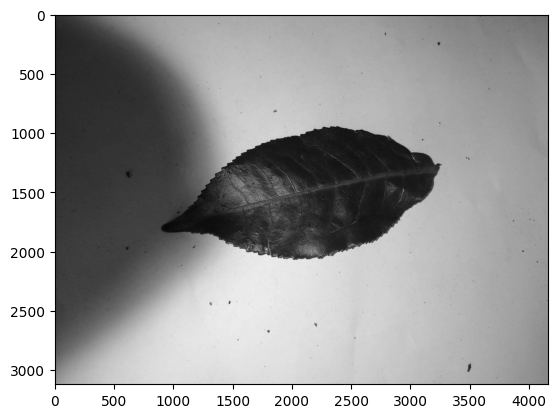

In [5]:
for cpath in os.listdir(fpath):
  cpath = os.path.join(fpath,cpath)
  for imgpath in os.listdir(cpath):
    img = cv2.imread(os.path.join(cpath, imgpath), 0)
    plt.imshow(img, cmap='gray')
    break

In [6]:
class_names = []
for x in os.walk(fpath):
    sub_dir = x[0]
    sub_dir_list = str(sub_dir).split('/')
    x_class = (sub_dir_list[-1])
    class_names.append(x_class)

print(class_names)

['tea sickness dataset', 'Anthracnose', 'brown blight', 'white spot', 'gray light', 'healthy', 'algal leaf', 'red leaf spot', 'bird eye spot']


# Displaying 5 images of healthy as well as each disease

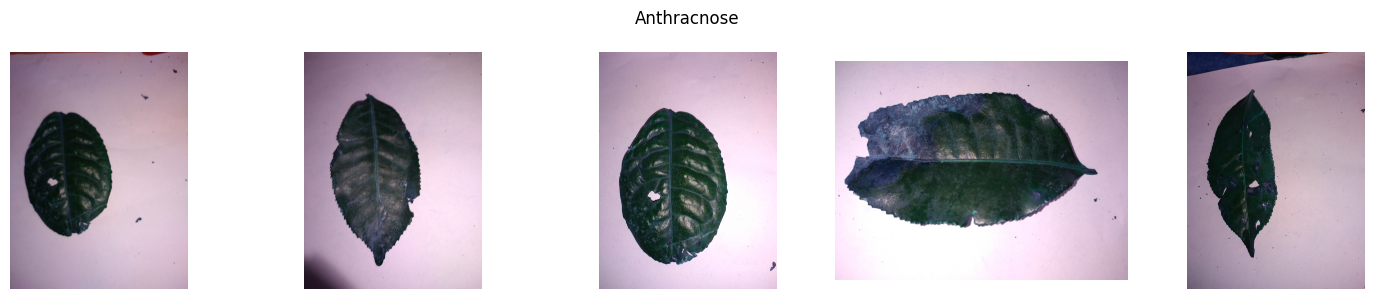

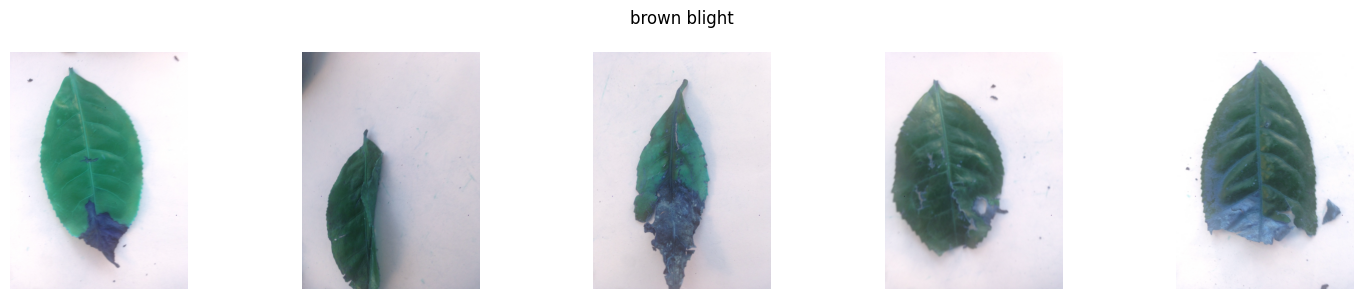

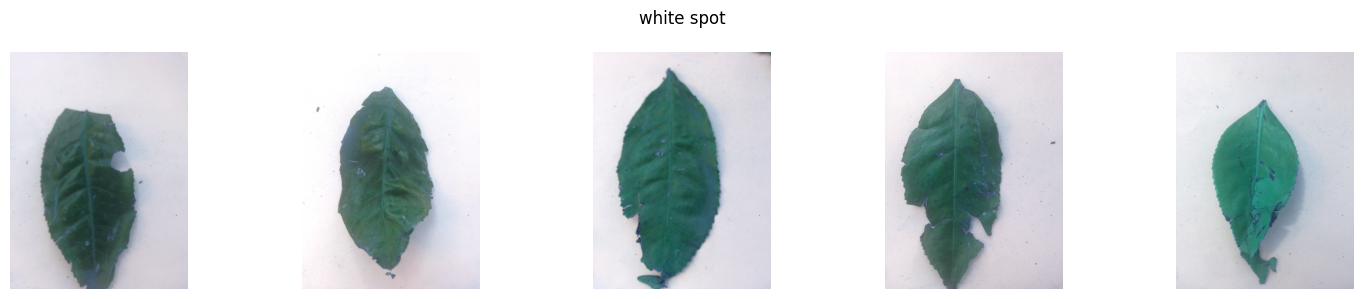

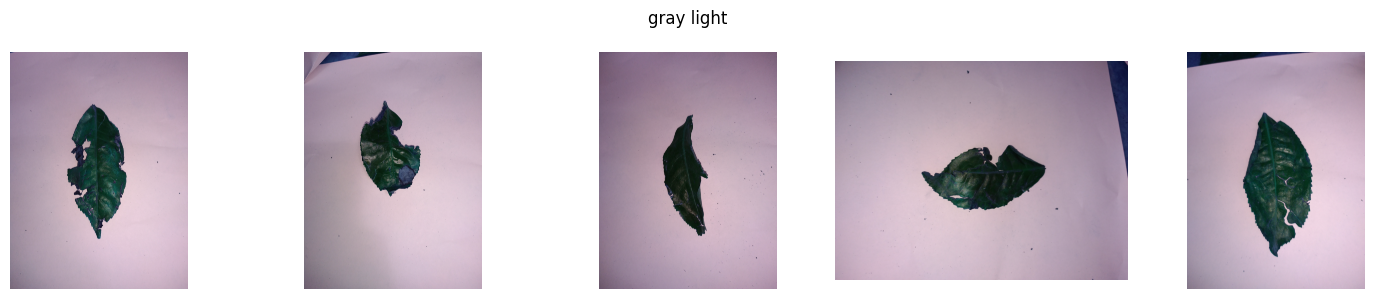

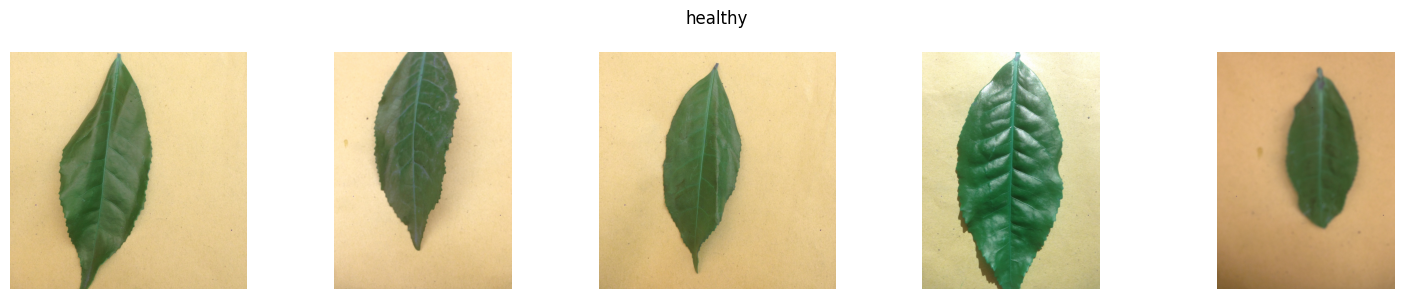

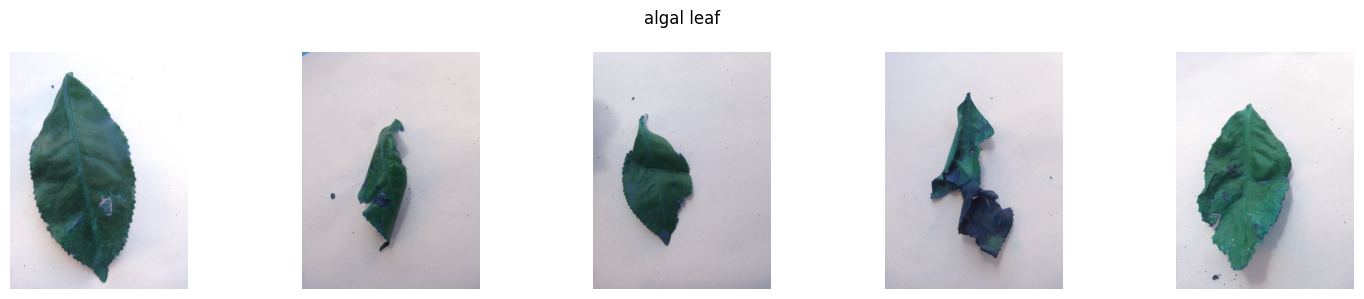

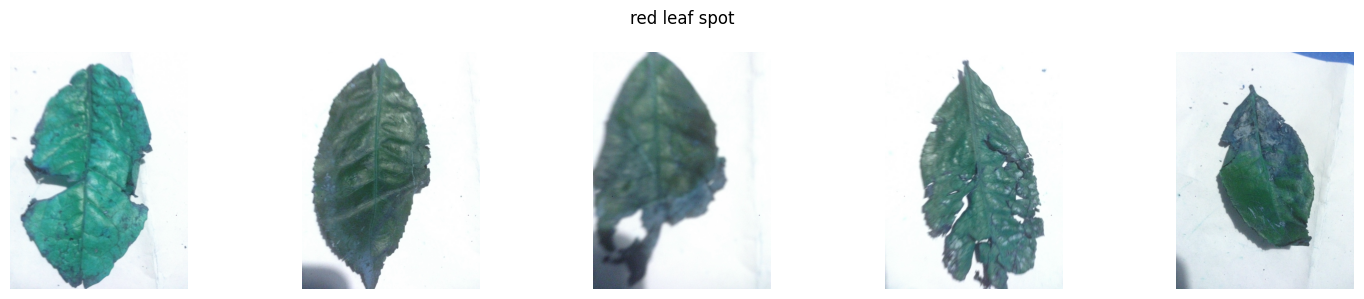

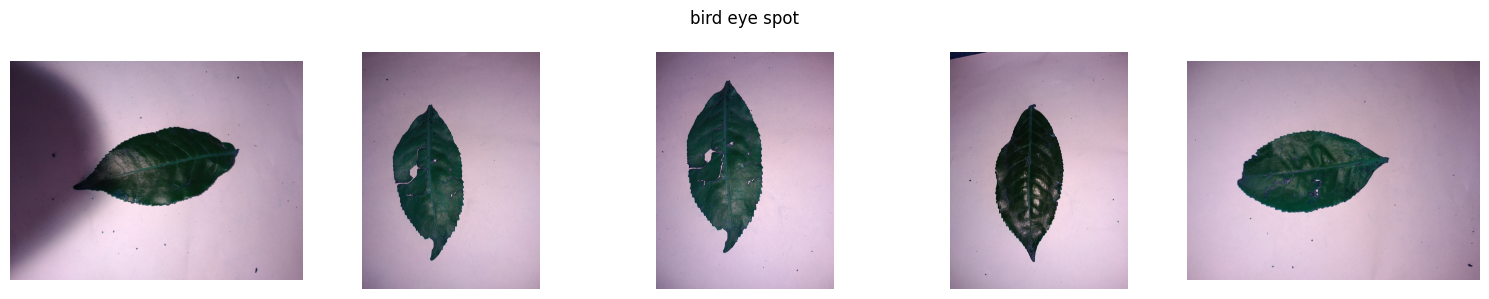

In [7]:
import matplotlib.pyplot as plt
import cv2
import os

for cpath in os.listdir(fpath):
  cpath = os.path.join(fpath, cpath)

  img_paths = [os.path.join(cpath, imgpath) for imgpath in os.listdir(cpath)]


  fig, axs = plt.subplots(1, 5, figsize=(15, 3))


  for i, img_path in enumerate(img_paths[:5]):
    img = cv2.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')

  fig.suptitle(os.path.basename(cpath))

  plt.tight_layout()
  plt.show()


# Displaying Total number of images in the dataset

In [8]:
total_images = 0
for cpath in os.listdir(fpath):
    cpath = os.path.join(fpath, cpath)

    for imgpath in os.listdir(cpath):
        # Increment the total image count
        total_images = total_images + 1

In [9]:
print(total_images)

885


In [10]:
target_folder = 'Anthracnose'
anthfolder = os.path.join(fpath,target_folder)
len(os.listdir(anthfolder))

100

In [11]:
target_folders = ['Anthracnose','algal leaf','bird eye spot','brown blight','gray light','healthy','red leaf spot','white spot']

for folder in target_folders:
  currFolder = os.path.join(fpath,folder)
  print("Number of images in",folder,"is : ",len(os.listdir(currFolder)))

Number of images in Anthracnose is :  100
Number of images in algal leaf is :  113
Number of images in bird eye spot is :  100
Number of images in brown blight is :  113
Number of images in gray light is :  100
Number of images in healthy is :  74
Number of images in red leaf spot is :  143
Number of images in white spot is :  142


# Spliting Dataset for training, testing and validation

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import cv2
from sklearn.model_selection import train_test_split

In [13]:
filepath = []
labels = []
for label in os.listdir(fpath):
  for img_path in os.listdir(os.path.join(fpath, label)):
    filepath.append(os.path.join(fpath, label, img_path))
    labels.append(label)
labels = pd.Series(labels, name='labels')
filepaths = pd.Series(filepath, name='filepaths')
df = pd.concat([filepaths, labels], axis=1)

In [14]:
df.head()

,filepaths,labels
0,/tmp/tea sickness dataset/Anthracnose/IMG_2022...,Anthracnose
1,/tmp/tea sickness dataset/Anthracnose/IMG_2022...,Anthracnose
2,/tmp/tea sickness dataset/Anthracnose/IMG_2022...,Anthracnose
3,/tmp/tea sickness dataset/Anthracnose/IMG_2022...,Anthracnose
4,/tmp/tea sickness dataset/Anthracnose/IMG_2022...,Anthracnose


In [15]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [16]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True,
    rescale = 1/255.0,
    validation_split = 0.2
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0
)

In [17]:
train_dataset = train_datagen.flow_from_dataframe(
  df_train,
  x_col = 'filepaths',
  y_col = 'labels',
  color_mode='rgb',
  subset="training",
  target_size = (256,256)
)

validation_dataset = train_datagen.flow_from_dataframe(
  df_train,
  x_col = 'filepaths',
  y_col = 'labels',
  color_mode='rgb',
  subset="validation",
  target_size = (256,256)
)

Found 567 validated image filenames belonging to 8 classes.
Found 141 validated image filenames belonging to 8 classes.


In [18]:
test_dataset = train_datagen.flow_from_dataframe(
    df_test,
    x_col = 'filepaths',
    y_col = 'labels',
    color_mode='rgb',
    target_size = (256,256)
)

Found 177 validated image filenames belonging to 8 classes.


# Defining the model

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [20]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding = 'same',input_shape=(256,256,3)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8,activation='softmax'))



In [21]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 128)       0         
 g2D)                                                   

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [24]:
epochs=10
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs,
  batch_size=32,
  callbacks=[early_stopping]
)

Epoch 1/10
18/18 [==============================] - 84s 3s/step - loss: 2.0849 - accuracy: 0.1446 - val_loss: 2.0765 - val_accuracy: 0.0922
Epoch 2/10
18/18 [==============================] - 28s 2s/step - loss: 2.0518 - accuracy: 0.1287 - val_loss: 1.9771 - val_accuracy: 0.1418
Epoch 3/10
18/18 [==============================] - 30s 2s/step - loss: 1.9911 - accuracy: 0.1164 - val_loss: 1.9401 - val_accuracy: 0.2270
Epoch 4/10
18/18 [==============================] - 30s 2s/step - loss: 1.8627 - accuracy: 0.2152 - val_loss: 1.3902 - val_accuracy: 0.3617
Epoch 5/10
18/18 [==============================] - 31s 2s/step - loss: 1.5144 - accuracy: 0.3316 - val_loss: 1.3190 - val_accuracy: 0.3830
Epoch 6/10
18/18 [==============================] - 29s 2s/step - loss: 1.3159 - accuracy: 0.3563 - val_loss: 1.1681 - val_accuracy: 0.4255
Epoch 7/10
18/18 [==============================] - 27s 2s/step - loss: 1.2755 - accuracy: 0.4004 - val_loss: 1.1868 - val_accuracy: 0.5177
Epoch 8/10
18/18 [==

In [25]:
epochs=20
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs,
  batch_size=32,
  callbacks=[early_stopping]
)

Epoch 1/20
18/18 [==============================] - 35s 2s/step - loss: 1.0550 - accuracy: 0.4815 - val_loss: 1.0359 - val_accuracy: 0.4326
Epoch 2/20
18/18 [==============================] - 27s 2s/step - loss: 1.0703 - accuracy: 0.4956 - val_loss: 0.9976 - val_accuracy: 0.5461
Epoch 3/20
18/18 [==============================] - 30s 2s/step - loss: 1.0365 - accuracy: 0.5044 - val_loss: 0.9659 - val_accuracy: 0.4894
Epoch 4/20
18/18 [==============================] - 37s 2s/step - loss: 0.9897 - accuracy: 0.5379 - val_loss: 0.9860 - val_accuracy: 0.5603
Epoch 5/20
18/18 [==============================] - 29s 2s/step - loss: 0.9934 - accuracy: 0.5573 - val_loss: 0.9015 - val_accuracy: 0.6596
Epoch 6/20
18/18 [==============================] - 29s 2s/step - loss: 1.0001 - accuracy: 0.5414 - val_loss: 0.9849 - val_accuracy: 0.4681
Epoch 7/20
18/18 [==============================] - 28s 2s/step - loss: 1.0171 - accuracy: 0.5132 - val_loss: 0.9886 - val_accuracy: 0.5177
Epoch 8/20
18/18 [==

In [27]:
epochs=30
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs,
  batch_size=32,
  # callbacks=[early_stopping]
)

Epoch 1/30
18/18 [==============================] - 30s 2s/step - loss: 0.4406 - accuracy: 0.8166 - val_loss: 0.6189 - val_accuracy: 0.7518
Epoch 2/30
18/18 [==============================] - 28s 2s/step - loss: 0.4409 - accuracy: 0.8060 - val_loss: 0.7337 - val_accuracy: 0.7518
Epoch 3/30
18/18 [==============================] - 26s 1s/step - loss: 0.5250 - accuracy: 0.7813 - val_loss: 0.7308 - val_accuracy: 0.7234
Epoch 4/30
18/18 [==============================] - 28s 2s/step - loss: 0.4720 - accuracy: 0.8078 - val_loss: 0.7097 - val_accuracy: 0.7305
Epoch 5/30
18/18 [==============================] - 27s 2s/step - loss: 0.4228 - accuracy: 0.8236 - val_loss: 0.5241 - val_accuracy: 0.8227
Epoch 6/30
18/18 [==============================] - 30s 2s/step - loss: 0.4484 - accuracy: 0.8078 - val_loss: 0.6604 - val_accuracy: 0.7376
Epoch 7/30
18/18 [==============================] - 27s 1s/step - loss: 0.4345 - accuracy: 0.8360 - val_loss: 0.6232 - val_accuracy: 0.7305
Epoch 8/30
18/18 [==